# Polyglot Unconference

This notebook holds a project conducting data analysis and visualization of the 2017 Polyglot Vancouver Un-Conference.
See the README in this repository for background information.



## Data Gathering

The data was initially recorded in a Markdown table, so was converted to CSV in order to be used within this notebook.

Here is an example of the original table:

| PERSON  | TALKS | GENDER | STAYED | NOTES |
|----|----|---|---|---|
| H1 | 20 | M | Y |
| 01 | 31 | M | Y | OMFG |
| 02 | 07 | M | Y |  |
| 03 | 08 | M | Y |  |
| 04 | 05 | M | Y |  |
| 05 | 04 | M | Y |  |


The format consisted of 5 Header sections, as seen in the example above:

 * Person -- a simple mnemonic (H means Host) recording a unique identifier for an individual
 * Talks -- the amount of time they spoke
 * Gender -- Male or Female (surface reading, I did not approach anyone to clarify)
 * Stayed -- Whether they stayed for the entire session (Y) or not (N), or were late (L)
 * Notes -- Certain notes. Mostly sanitized from the original recording. There are two instances of cross linking against figues from the first session.



## Session 01 - "SOLID is wrong"

Well... you can kinda see how this one drew out the opinionated neckbeards first thing in the morning! ;)

But seriously, this session was so incredibly unbalanced that it just blew my mind. One person in particular injected himself - unasked and unwarranted - into every possible section of the conversation.

About 10 minutes in, when it was becoming painfully obvious that the conversation was being railroaded and the only woman had left, someone suggested that we adopt the [fishbowl technique](https://unconference.net/unconference-methods-fish-bowl-dialogue/), which helped somewhat. In the original Markdown file you can see the before and after split, but for the purposes of analysis I am only using the summation of the data from the session. I have also dropped the **Notes** header from the CSV.


### Python imports

In [1]:
# Imports

import sys
import pandas as pd
import csv

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [89]:
# %load util.py
#!/usr/bin/python

# Util file to import in all of the notebooks to allow for easy code re-use


# Calculate Percent of Attendees that did not speak
def percent_silent(df):
    total = len(df)
    silent = 0
    for row in df.iteritems():
        if row[1] == 0:
            silent = silent + 1

    percent = {}
    percent['TOTAL'] = total
    percent['SILENT'] = silent
    percent['VERBOSE'] = total - silent
    return percent

# Calculate Percent of Attendees that left
def percent_left(df):
    total = len(df)
    left = 0
    for row in df.iteritems():
        if row[1] == 0:
            left = left + 1

    percent = {}
    percent['TOTAL'] = total
    percent['LEFT'] = left
    percent['STAYED'] = total - left
    return percent

# Calculate Percent of Attendees along gender
def percent_gender(df):
    total = len(df)
    female = 0
    for row in df.iteritems():
        if row[1] == 1:
            female = female + 1

    percent = {}
    percent['TOTAL'] = total
    percent['FEMALE'] = female
    percent['MALE'] = total - female
    return percent

# Calculate Percent of Talking points by
def percent_talking_gender(df):
    total = 0
    male = 0
    female = 0
    for talks, gender in df.itertuples(index=False):
        if talks > 0:
            total = total + 1
            if gender == 0:
                male = male + 1
            elif gender == 1:
                female = female + 1

    percent = {}
    percent['TOTAL'] = total
    percent['FEMALE'] = female
    percent['MALE'] = male
    return percent


### Reading the Data

In [3]:
# Read
data = pd.read_csv('data/1_solid.csv')

# Display
data

,PERSON,TALKS,GENDER,STAYED
0,H1,29,M,Y
1,01,40,M,Y
2,02,7,M,Y
3,03,9,M,Y
4,04,6,M,Y
5,05,8,M,Y
6,06,2,M,Y
7,07,5,M,Y
8,08,1,M,Y
9,09,0,M,Y


### Sanitizing the Data

As we can see, some of our data is stored in a non-numerical format which makes it difficult to perform the maths upon. 

Let's clean it up.

In [4]:
# Convert GENDER to Binary (sorry, i know...)

data.loc[data["GENDER"] == "M", "GENDER"] = 0
data.loc[data["GENDER"] == "F", "GENDER"] = 1

# Convert STAYED to 1 and Left/Late to 0

data.loc[data["STAYED"] == "Y", "STAYED"] = 1
data.loc[data["STAYED"] == "N", "STAYED"] = 0
data.loc[data["STAYED"] == "L", "STAYED"] = 0

# We should now see the data in numeric values
data

,PERSON,TALKS,GENDER,STAYED
0,H1,29,0,1
1,01,40,0,1
2,02,7,0,1
3,03,9,0,1
4,04,6,0,1
5,05,8,0,1
6,06,2,0,1
7,07,5,0,1
8,08,1,0,1
9,09,0,0,1


### Analysis and Visualization (V1)

Let's do some really basic passes at the data before we run some mathematical computations on it, just to get a better sense of where it stands at the moment.

In [5]:
# Run Describe to give us some basic Min/Max/Mean/Std values

data.describe()

,TALKS
count,29.000000
mean,3.862069
std,9.022686
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,40.000000


In [6]:
# Run Value_Counts in order to see some basic grouping by attribute

vc_talks = data['TALKS'].value_counts()
vc_talks

0     17
1      3
29     1
8      1
9      1
40     1
7      1
6      1
5      1
3      1
2      1
Name: TALKS, dtype: int64

In [7]:
vc_gender = data['GENDER'].value_counts()
vc_gender

0    28
1     1
Name: GENDER, dtype: int64

In [8]:
vc_stayed = data['STAYED'].value_counts()
vc_stayed

1    25
0     4
Name: STAYED, dtype: int64

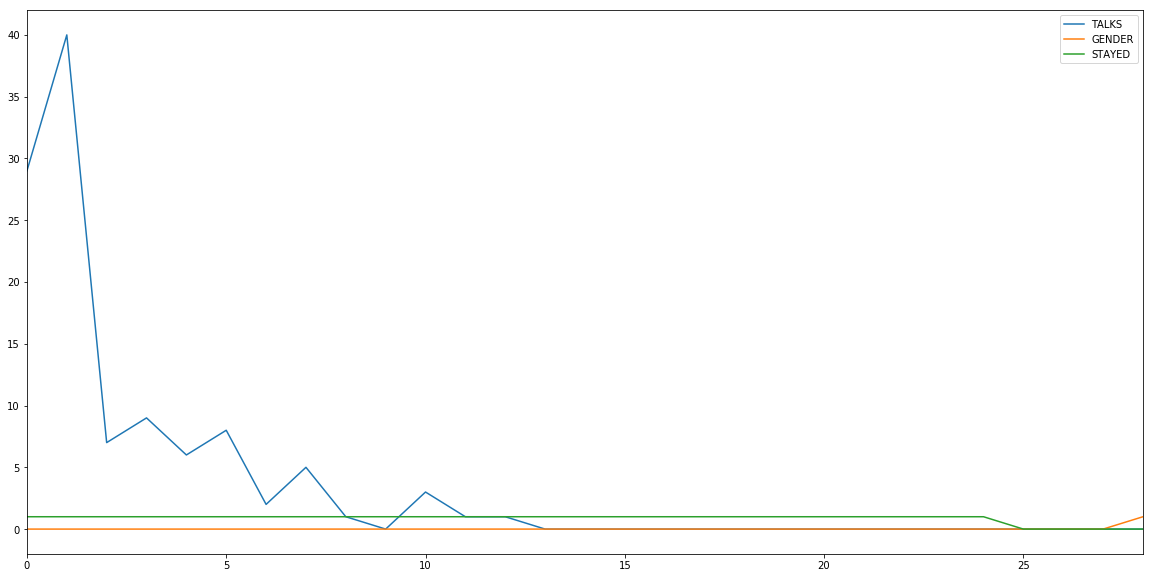

In [9]:
# Now let's do some basic plotting with MatPlotLib

data.plot()

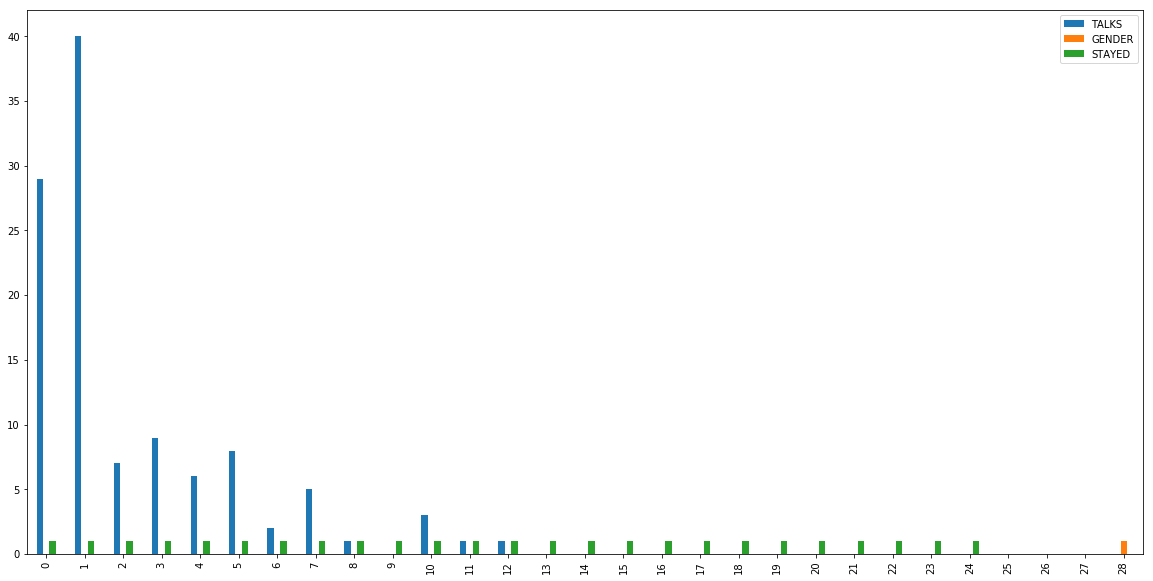

In [10]:
data.plot(kind='bar')

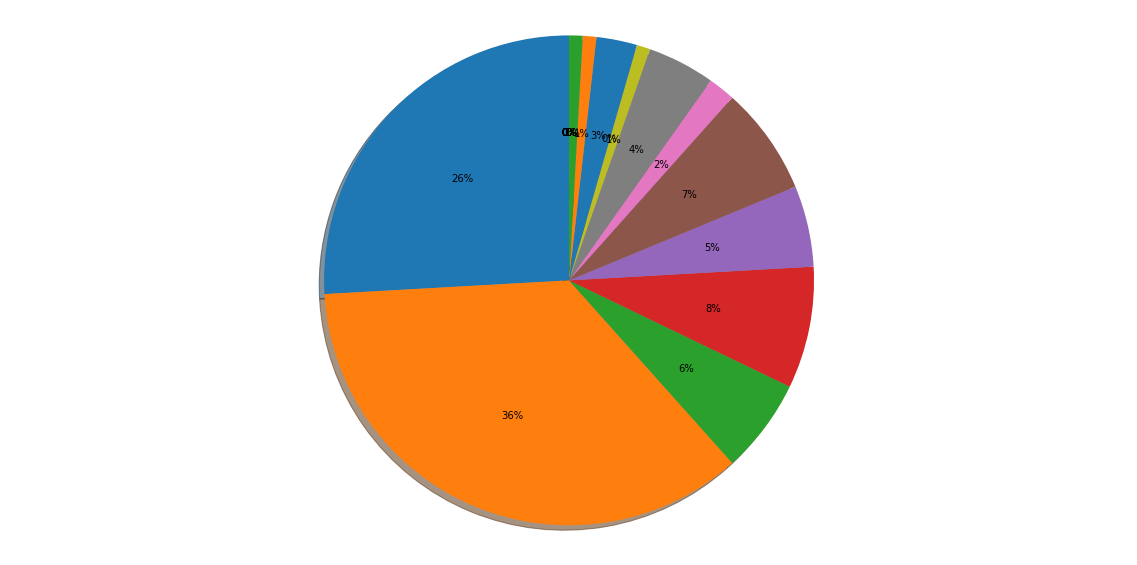

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(data['TALKS'], autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

### Analysis and Visualization (V2)

Before we go too much farther, I want to point out that the first **Person H1** was the host, and was by default speaking a lot. However, you can clearly see that **Person 01** spoke even more than them... 

For the sake of mapping the actual conversational flow amongst the participants, I am going to run these analyses and visualizations again while removing the host...

In [12]:
data_hostless = data.drop(data.index[0])
data_hostless.head()

,PERSON,TALKS,GENDER,STAYED
1,01,40,0,1
2,02,7,0,1
3,03,9,0,1
4,04,6,0,1
5,05,8,0,1


In [13]:
data_hostless.describe()

,TALKS
count,28.000000
mean,2.964286
std,7.757826
min,0.000000
25%,0.000000
50%,0.000000
75%,2.250000
max,40.000000


In [14]:
dh_vc_talks = data_hostless['TALKS'].value_counts()
dh_vc_talks

0     17
1      3
8      1
9      1
40     1
7      1
6      1
5      1
3      1
2      1
Name: TALKS, dtype: int64

In [15]:
dh_vc_gender = data_hostless['GENDER'].value_counts()
dh_vc_gender

0    27
1     1
Name: GENDER, dtype: int64

In [16]:
dh_vc_stayed = data_hostless['STAYED'].value_counts()
dh_vc_stayed

1    24
0     4
Name: STAYED, dtype: int64

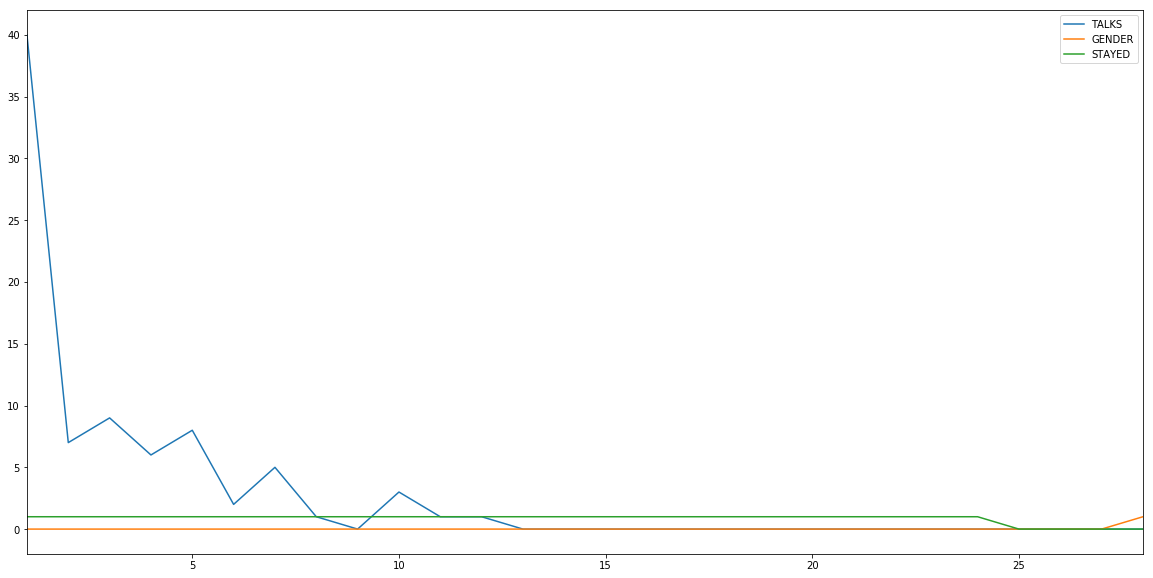

In [17]:
data_hostless.plot()

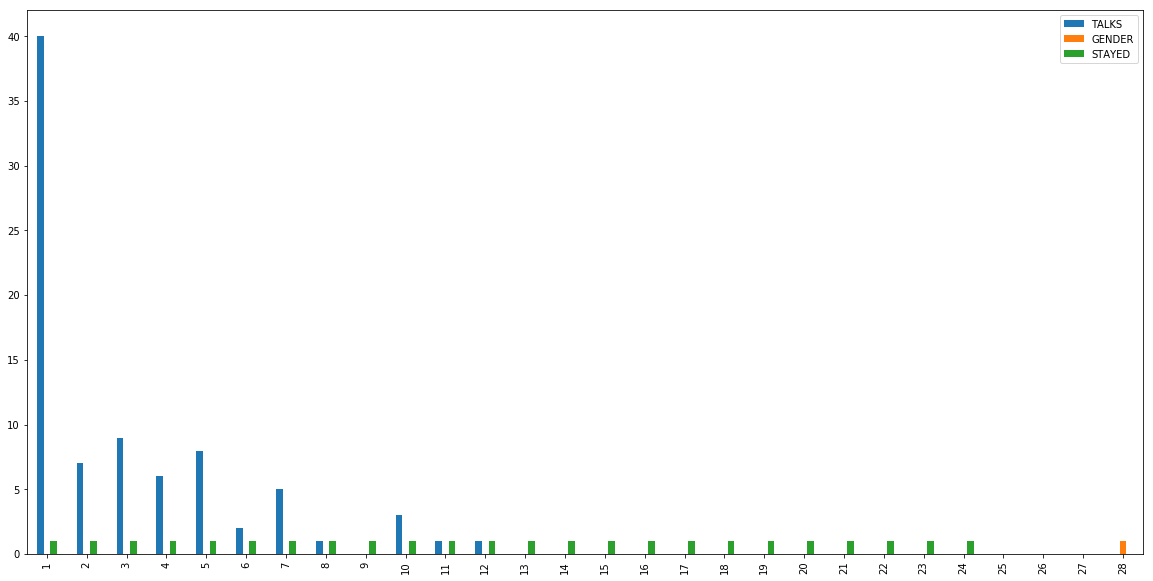

In [18]:
data_hostless.plot(kind='bar')

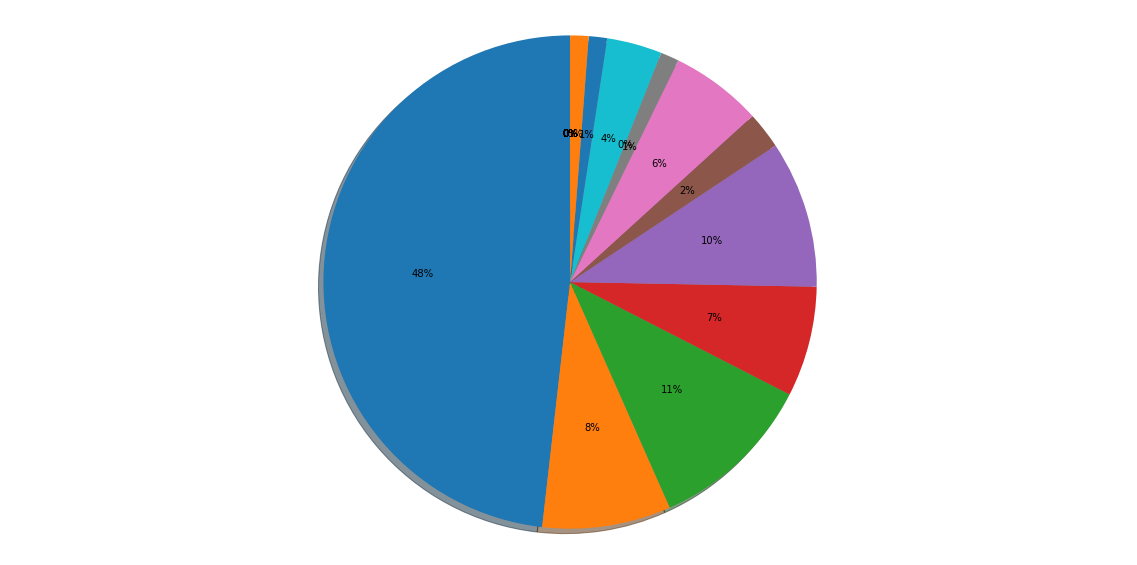

In [19]:
fig1, ax1 = plt.subplots()
ax1.pie(data_hostless['TALKS'], autopct='%1.f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

**HOLY SHIT**

... just look at that chart above. 

One person monopolized essentially 50% of the conversation!!!

### Algebraic Analysis

Now lets step into some deeper (but probaby still naive) analysis based off of my rudiemtary understanding of Data Science! :D
 

In [28]:
# Percentage of attendees that were silent during the talk

silent = percent_silent(data['TALKS'])
silent


{'SILENT': 17, 'TOTAL': 29, 'VERBOSE': 12}

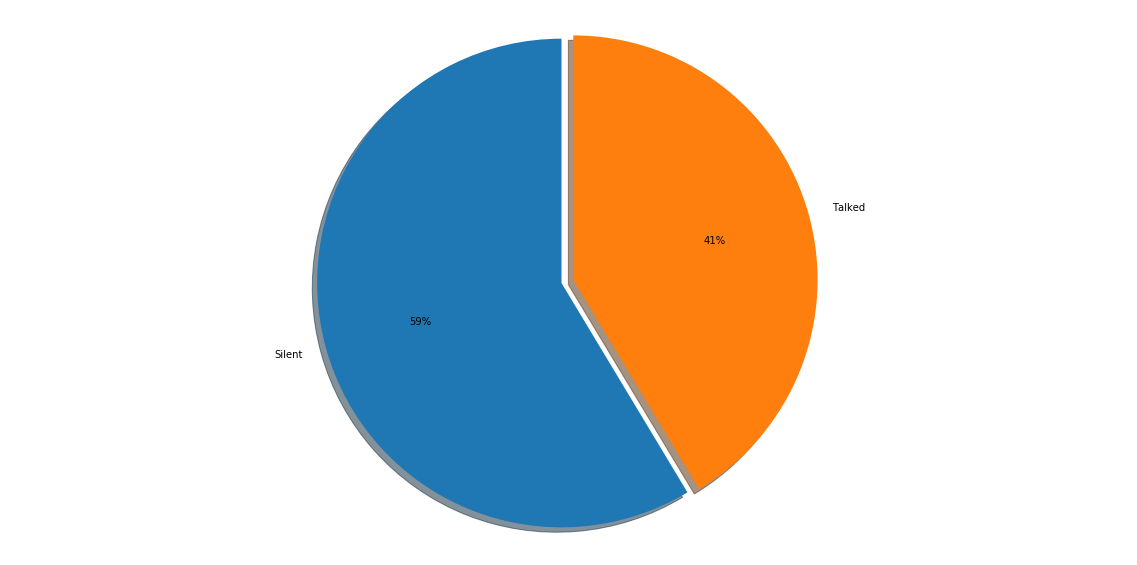

In [29]:
fig1, ax1 = plt.subplots()

sizes = [silent['SILENT'], silent['VERBOSE']]
labels = 'Silent', 'Talked'
explode = (0.05, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [27]:
# Percentage of attendees that left early during the talk

left = percent_left(data['STAYED'])
left

{'LEFT': 4, 'STAYED': 25, 'TOTAL': 29}

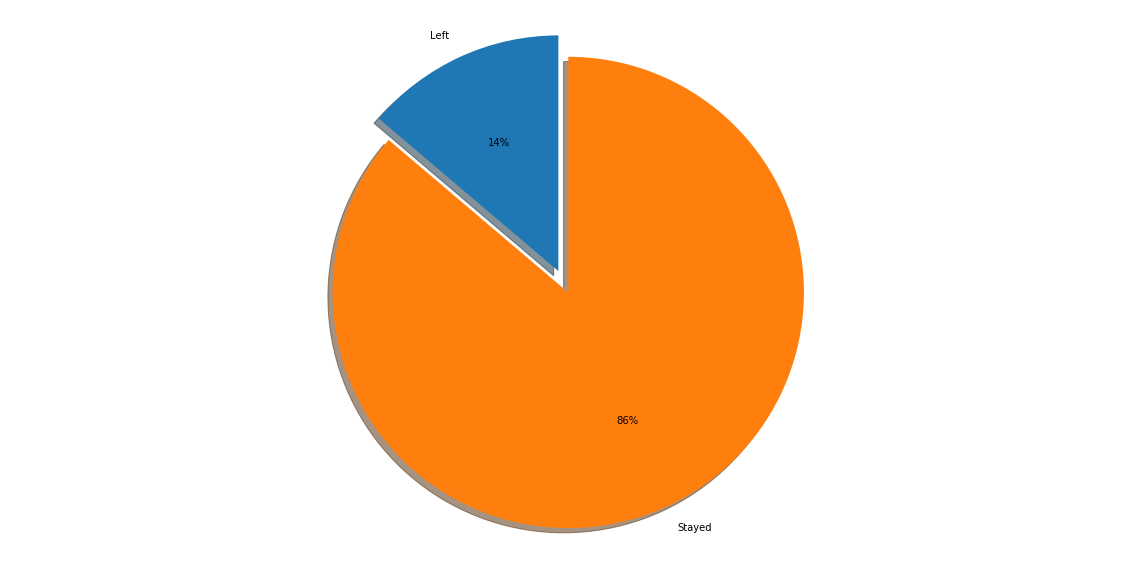

In [39]:
fig1, ax1 = plt.subplots()

sizes = [left['LEFT'], left['STAYED']]
labels = 'Left', 'Stayed'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [38]:
# Percentage of attendees that were Male vs. Female (see notes above around methodology)

gender = percent_gender(data['GENDER'])
gender

{'FEMALE': 1, 'MALE': 28, 'TOTAL': 29}

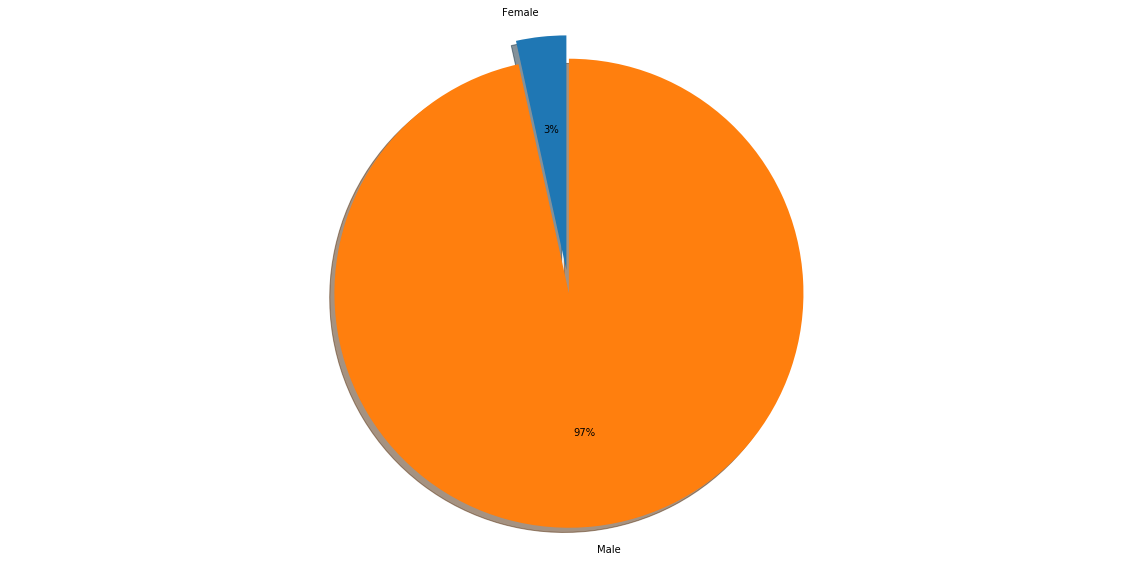

In [40]:
fig1, ax1 = plt.subplots()

sizes = [gender['FEMALE'], gender['MALE']]
labels = 'Female', 'Male'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [90]:
# Calculate Percent of Talking points by GENDER

distribution = percent_talking_gender(data[['TALKS','GENDER']])
distribution

{'FEMALE': 0, 'MALE': 12, 'TOTAL': 12}

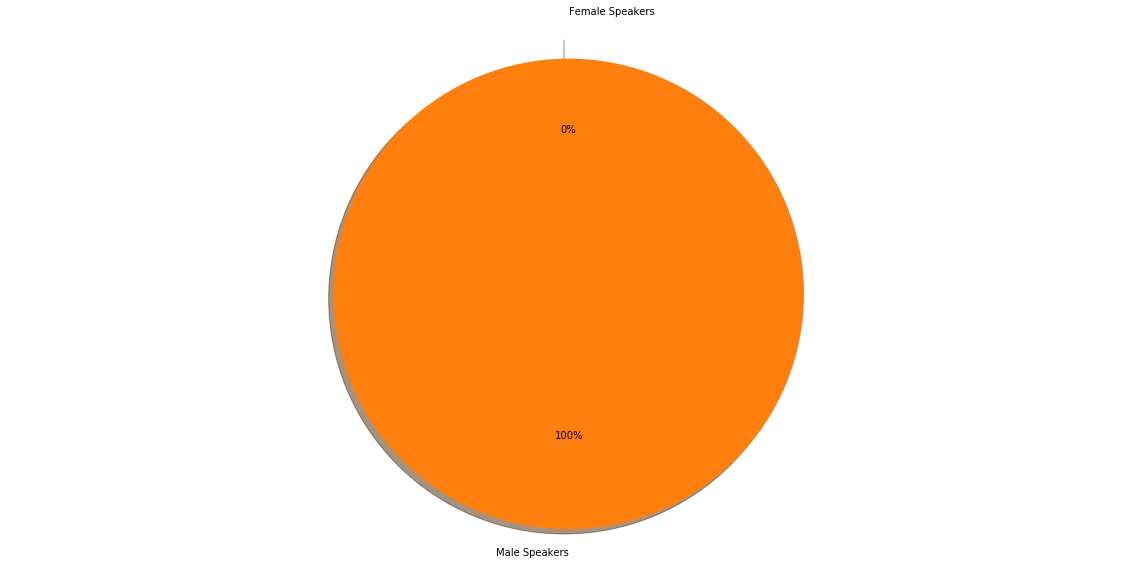

In [91]:
fig1, ax1 = plt.subplots()

sizes = [distribution['FEMALE'], distribution['MALE']]
labels = 'Female Speakers', 'Male Speakers'
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()